In [19]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (2).csv


In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
from sklearn.metrics import classification_report


In [27]:
heart = pd.read_csv('/content/heart.csv')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [28]:
new_= heart
le =LabelEncoder()
le.fit(new_['Sex'])
new_['Encoder_sex']=le.transform(new_['Sex'])
new_=new_.drop('Sex',axis=1)
le.fit(new_['ST_Slope'])
new_['Encoder_ST_Slope']=le.transform(new_['ST_Slope'])
new_=new_.drop('ST_Slope',axis=1)
le.fit(new_['ExerciseAngina'])
new_['Encoder_ExerciseAngina']=le.transform(new_['ExerciseAngina'])
new_=new_.drop('ExerciseAngina',axis=1)
le.fit(new_['RestingECG'])
new_['Encoder_RestingECG']=le.transform(new_['RestingECG'])
new_=new_.drop('RestingECG',axis=1)
le.fit(new_['ChestPainType'])
new_['Encoder_ChestPainType']=le.transform(new_['ChestPainType'])
new_=new_.drop('ChestPainType',axis=1)
new_

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Encoder_sex,Encoder_ST_Slope,Encoder_ExerciseAngina,Encoder_RestingECG,Encoder_ChestPainType
0,40,140,289,0,172,0.0,0,1,2,0,1,1
1,49,160,180,0,156,1.0,1,0,1,0,1,2
2,37,130,283,0,98,0.0,0,1,2,0,2,1
3,48,138,214,0,108,1.5,1,0,1,1,1,0
4,54,150,195,0,122,0.0,0,1,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,1,0,1,3
914,68,144,193,1,141,3.4,1,1,1,0,1,0
915,57,130,131,0,115,1.2,1,1,1,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,1


In [37]:
scaler = MinMaxScaler()
columns = new_.columns
new_ = pd.DataFrame(scaler.fit_transform(new_))
new_.columns = columns
new_

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Encoder_sex,Encoder_ST_Slope,Encoder_ExerciseAngina,Encoder_RestingECG,Encoder_ChestPainType
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0.0,1.0,1.0,0.0,0.5,0.333333
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1.0,0.0,0.5,0.0,0.5,0.666667
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0.0,1.0,1.0,0.0,1.0,0.333333
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1.0,0.0,0.5,1.0,0.5,0.000000
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0.0,1.0,1.0,0.0,0.5,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.55,0.437811,0.0,0.507042,0.431818,1.0,1.0,0.5,0.0,0.5,1.000000
914,0.816327,0.72,0.320066,1.0,0.570423,0.681818,1.0,1.0,0.5,0.0,0.5,0.000000
915,0.591837,0.65,0.217247,0.0,0.387324,0.431818,1.0,1.0,0.5,1.0,0.5,0.000000
916,0.591837,0.65,0.391376,0.0,0.802817,0.295455,1.0,0.0,0.5,0.0,0.0,0.333333


In [38]:
attributes = ["Age", "Encoder_sex", "Encoder_ChestPainType", "RestingBP", "Cholesterol", "FastingBS", "Encoder_RestingECG", "MaxHR", "Encoder_ExerciseAngina", "Oldpeak", "Encoder_ST_Slope"]
X = new_[attributes]
y = new_['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

The mean absolute error:
0.1565217391304348

Accuracy score:
0.8434782608695652

Accuracy =  84.35  %
Classification report: 
              precision    recall  f1-score   support

         0.0       0.83      0.76      0.80        92
         1.0       0.85      0.90      0.87       138

    accuracy                           0.84       230
   macro avg       0.84      0.83      0.83       230
weighted avg       0.84      0.84      0.84       230


Confusion matrix: 
[[ 70  22]
 [ 14 124]]



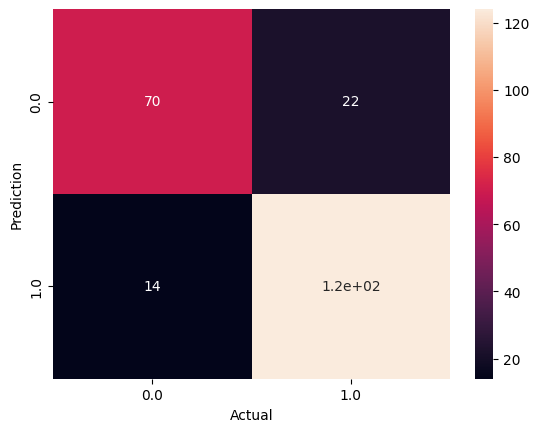

In [39]:
#Creating and fitting the model, as well as generating predictions
svm_model = SVC(random_state=0)
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

#Model evaluation
#Mean absolute error

print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

#Accuracy score

svm_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(svm_model_accuracy))
svm_model_accuracy = round(accuracy_score(y_test, preds)*100,2)
print('Accuracy = ' , svm_model_accuracy ,' %')
accuracies = pd.DataFrame({"Algorithm":["SVM"], "Score":[svm_model_accuracy]})


#Classification report

print("Classification report: \n{}\n".format(classification_report(y_test, preds)))

#Confusion matrix

print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))
sns.heatmap(data=confusion_matrix(y_test, preds), annot=True, xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.show()

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size=0.8)

model =RandomForestClassifier(n_estimators=150,criterion='gini',max_depth=90,max_leaf_nodes=120
                              ,verbose=1)

model.fit(X_train, y_train)
preds=model.predict(X_valid)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

         0.0       0.91      0.81      0.86        86
         1.0       0.85      0.93      0.89        98

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



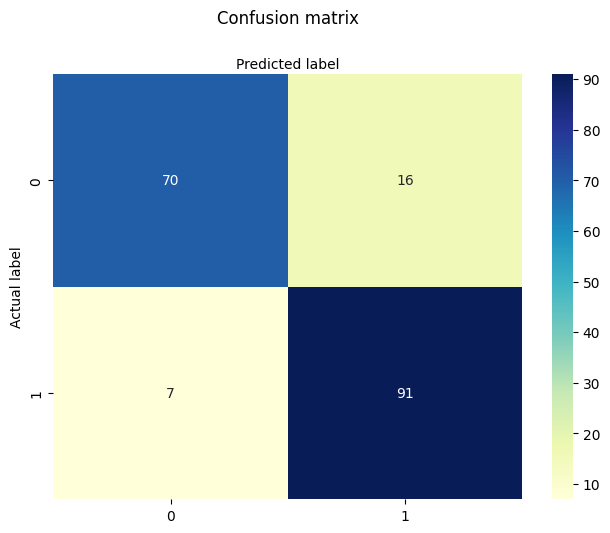

In [41]:
cnf_matrix = metrics.confusion_matrix(y_valid, preds)
cnf_matrix


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



print(classification_report(y_valid, preds))

In [42]:
attributes2 = ["Age", "Encoder_sex", "Encoder_ChestPainType", "RestingBP",  "Encoder_RestingECG", "MaxHR"]
X = new_[attributes2]
y = new_['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

The mean absolute error:
0.22608695652173913

Accuracy score:
0.7739130434782608

Accuracy =  77.39  %
Classification report: 
              precision    recall  f1-score   support

         0.0       0.74      0.66      0.70        92
         1.0       0.79      0.85      0.82       138

    accuracy                           0.77       230
   macro avg       0.77      0.76      0.76       230
weighted avg       0.77      0.77      0.77       230


Confusion matrix: 
[[ 61  31]
 [ 21 117]]



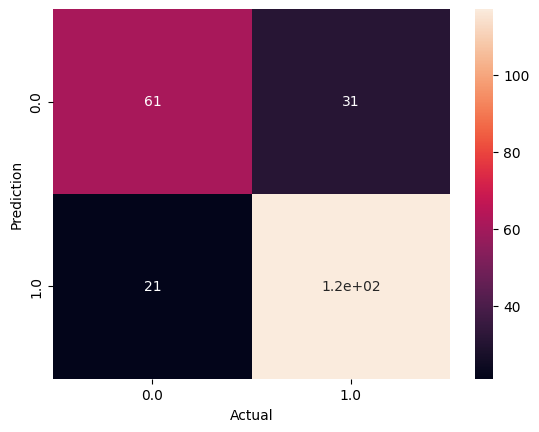

In [43]:
svm_model = SVC(random_state=0)
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

#Model evaluation
#Mean absolute error

print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

#Accuracy score

svm_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(svm_model_accuracy))
svm_model_accuracy = round(accuracy_score(y_test, preds)*100,2)
print('Accuracy = ' , svm_model_accuracy ,' %')
accuracies = pd.DataFrame({"Algorithm":["SVM"], "Score":[svm_model_accuracy]})


#Classification report

print("Classification report: \n{}\n".format(classification_report(y_test, preds)))

#Confusion matrix

print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))
sns.heatmap(data=confusion_matrix(y_test, preds), annot=True, xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.show()

In [44]:
X = new_[attributes2]
y = new_['HeartDisease']
X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size=0.8)

model =RandomForestClassifier(n_estimators=150,criterion='gini',max_depth=90,max_leaf_nodes=120
                              ,verbose=1)

model.fit(X_train, y_train)
preds=model.predict(X_valid)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

         0.0       0.83      0.71      0.77        80
         1.0       0.80      0.88      0.84       104

    accuracy                           0.81       184
   macro avg       0.81      0.80      0.80       184
weighted avg       0.81      0.81      0.81       184



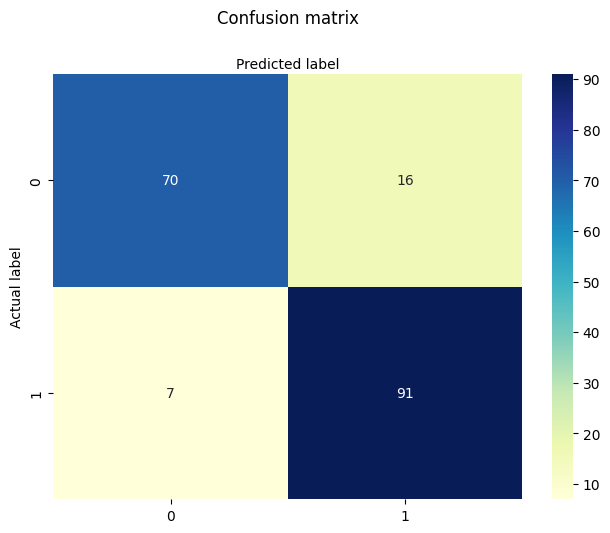

In [45]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



print(classification_report(y_valid, preds))